<h1 style="font-size:2em;color:#2467C0">Energy efficiency</h1>


<br><br> 

<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [1]:
#Import Libraries
import pandas as pd                              # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np                               # linear algebra
import sqlite3
import socket
import warnings
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
from subprocess import check_output
from IPython.display import Image


warnings.filterwarnings('ignore')                # ignore annoying warning (from sklearn and seaborn)
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Creating a Pandas DataFrame from a xlsx file<br></p>


In [2]:
file = pd.read_excel('DatosPunto1.xlsx')
df = pd.DataFrame(file)


<h1 style="font-size:1.7em;color:#2467C0">Exploring Data</h1>

We will start our data exploration by generating simple statistics of the data. 
<br><br> 

In [3]:
df.shape

(768, 10)

In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [5]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [6]:
#descriptive statistics summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


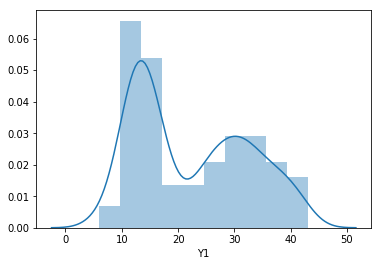

In [7]:
#histogram
sns.distplot(df['Y1']);

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>
<br>

We will not need Y2 we can clean it.

In [8]:
del df['Y2']

In [9]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95


In [10]:
df.shape

(768, 9)

In [11]:
# Missing Data
df[df.isnull().any(axis=1)]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1


We do not have mssing data

<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Declare the Columns You Want to Use as Features
<br><br></p>


In [12]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Specify the Prediction Target
<br><br></p>

In [13]:
target = ['Y1']

<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Extract Features and Target ('Y1') Values into Separate Dataframes
<br><br></p>

In [14]:
X = df[features]

In [15]:
y = df[target]

Let us look at a typical row from our features: 

In [16]:
X.iloc[2]

X1      0.98
X2    514.50
X3    294.00
X4    110.25
X5      7.00
X6      4.00
X7      0.00
X8      0.00
Name: 2, dtype: float64

Let us also display our target values: 

In [18]:
y.head(10)

,Y1
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84
5,21.46
6,20.71
7,19.68
8,19.50
9,19.95


<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Split the Dataset into Training and Test Datasets
<br><br></p>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

(1) Linear Regression: Fit a model to the training set
<br><br></p>

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Perform Prediction using Linear Regression Model
<br><br></p>


In [29]:
y_prediction = regressor.predict(X_test)
y_prediction[:10]

array([ 39.72,  15.3 ,  17.26,  31.53,  32.33,  10.34,  12.73,  14.03,
        10.38,  14.37])

In [24]:
y_test.head(10)

,Y1
742,39.31
709,15.29
623,17.15
391,32.29
343,31.66
218,10.07
322,12.73
654,13.94
219,10.14
698,14.32


<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Evaluate Linear Regression Accuracy using Root Mean Square Error

<br><br></p>


In [25]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [26]:
print(RMSE)

2.77367643951


<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

(2) Decision Tree Regressor: Fit a new regression model to the training set
<br><br></p>


In [27]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Perform Prediction using Decision Tree Regressor
<br><br></p>


In [28]:
y_prediction = regressor.predict(X_test)
y_prediction[:10]

array([ 39.72,  15.3 ,  17.26,  31.53,  32.33,  10.34,  12.73,  14.03,
        10.38,  14.37])

In [30]:
y_test.head(10)

,Y1
742,39.31
709,15.29
623,17.15
391,32.29
343,31.66
218,10.07
322,12.73
654,13.94
219,10.14
698,14.32


<p style="font-family: Arial; font-size:1.75em;color:#2467C0; font-style:bold"><br>

Evaluate Decision Tree Regression Accuracy using Root Mean Square Error

<br><br></p>


In [31]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [34]:
print(RMSE)

0.59466128783


:D 